In [1]:
# In this kernel, I am setting up my notebook so that I may run all my functions and add ons appropriately
from scipy import stats
from math import sqrt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns




from sklearn.model_selection import train_test_split



import warnings
warnings.filterwarnings("ignore")
import prepare_kwame

In [2]:
df, train, validate, test, X_train, X_validate, X_test, y_train, y_validate, y_test = prepare_kwame.prepare_zillow()

In [3]:
df.head()

,parcelid,id,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt
0,14297519,1727539,3.5,4.0,3100.0,1023282.0
1,17052889,1387261,1.0,2.0,1465.0,464000.0
2,14186244,11677,2.0,3.0,1243.0,564778.0
3,12177905,2288172,3.0,4.0,2376.0,145143.0
4,10887214,1970746,3.0,3.0,1312.0,119407.0


<h3> Hypothesis Testing </h2>

First Hypothesis<br><br>
$H_0$: Bathroom has no correlation on the tax value.<br>
$H_a$: Bathroom has a correlation with the tax value.<br>
correlation pearsons r coefficient

In [7]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [8]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.bathroomcnt, df.taxvaluedollarcnt)
r, p

(0.471765070343626, 0.0)

In [9]:
#Comparing my p value against my α
p < α

True

In [10]:
print("Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax value.")

Since p is less than α, we reject our null hypothesis that bathroom has no effect on the tax value.


Second Hypothesis<br><br>
$H_0$: There is no correlation between finished square feet and tax value.<br>
$H_a$: There is a correlation between finished square feet and tax value.<br>


In [11]:
n = df.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
conf_interval = .95 # desired confidence interval
α = 1 - conf_interval

In [12]:
# Testing the 1st hypothesis
r, p = stats.pearsonr(df.calculatedfinishedsquarefeet, df.taxvaluedollarcnt)
r, p

(0.583156301196327, 0.0)

In [13]:
#Comparing my p value against my α
p < α

True

In [14]:
print("Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax value.")

Since p is less than α, we reject our null hypothesis that there is no correlation between finished square feet and tax value.


In [15]:
# settting the random seed so that each reproduction will get the same numbers
np.random.seed(76)

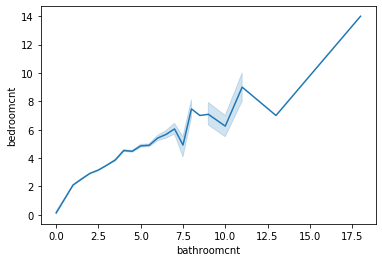

In [29]:
sns.lineplot(data= train, x='bathroomcnt', y= 'bedroomcnt', palette='viridis')

Text(0.5, 1, 'Relationship Plot of Train Data')

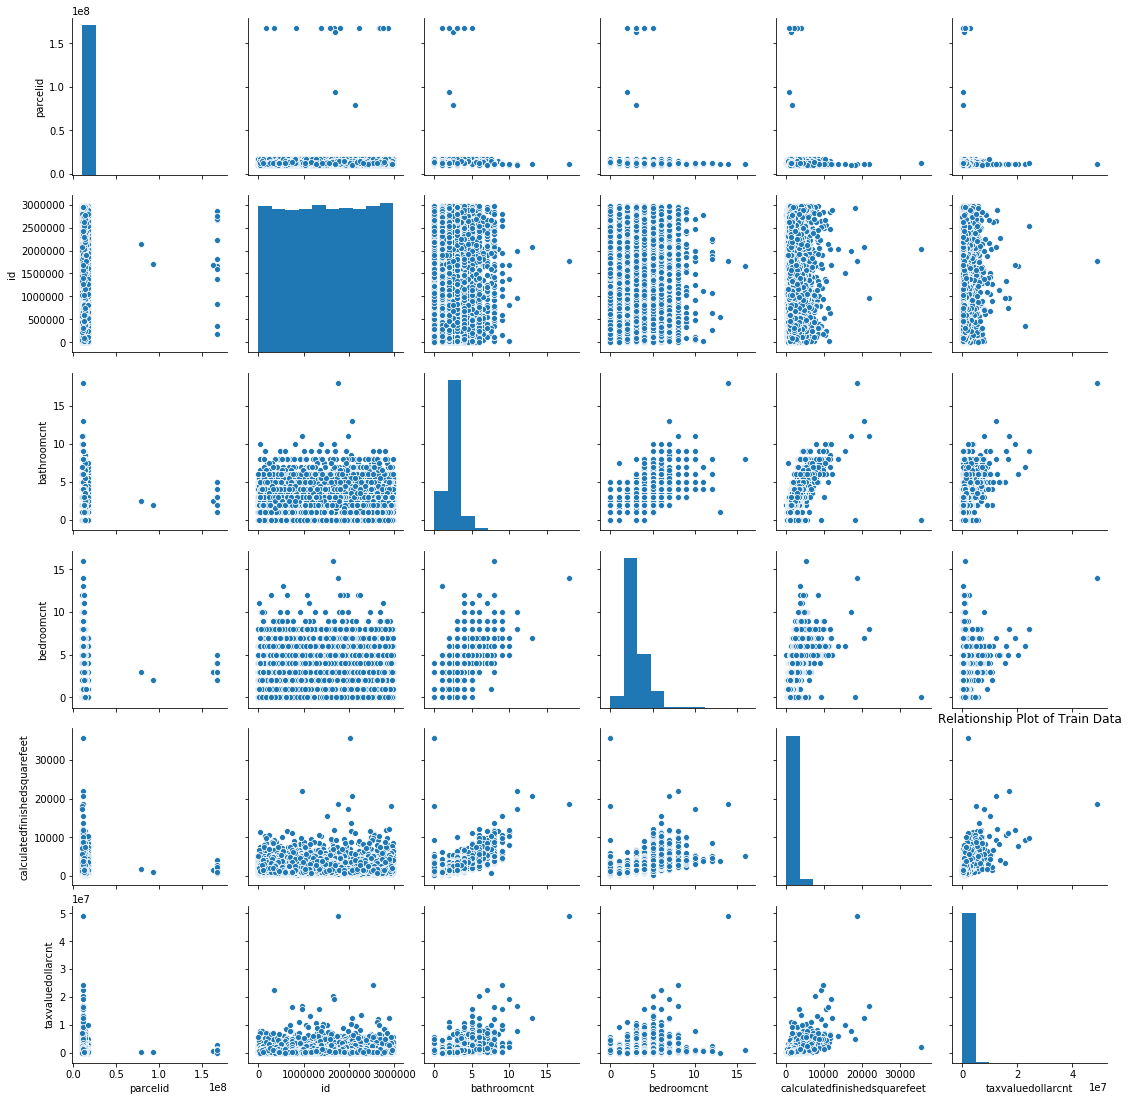

In [30]:
sns.pairplot(data=train)
plt.title('Relationship Plot of Train Data')

In [ ]:
train.taxvaluedollarcnt.value_counts().sort_index().plot(color='palevioletred')
tax_rate = train.taxvaluedollarcnt.mean()
plt.title(f"Overall Tax rate: {tax_rate:.2%}")
plt.xlabel('Tax')
ymax=(1)

In [ ]:
# sort = false will sort the bin values as opposed to the frequency counts
# value counts of tax_value_dollar_count by binning
train.taxvaluedollarcnt.value_counts(bins=5, sort=False)

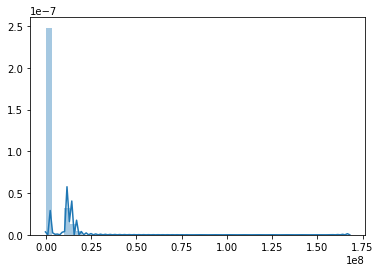

In [39]:
#visualizing the distribution 
sns.distplot(df)


In [ ]:
sns.boxplot(data=train, x='taxvaluedollarcnt', y='bathroomcnt')
plt.title('Bathrooms and Tax Value')
plt.figure(figsize=(30,30))


In [32]:
#Making a baseline prediction
df.taxvaluedollarcnt.value_counts()

400000.0    56
600000.0    50
350000.0    49
450000.0    45
420000.0    44
            ..
302897.0     1
144306.0     1
124876.0     1
247786.0     1
98304.0      1
Name: taxvaluedollarcnt, Length: 50811, dtype: int64

In [ ]:
!git add "gabby_exploration"